# comparison to bayes from ds from scratch
This gives 101 true positives (spam classified as “spam”), 33 false positives (ham classified
as “spam”), 704 true negatives (ham classified as “ham”), and 38 false negatives
(spam classified as “ham”). This means our precision is 101 / (101 + 33) = 75%, and
our recall is 101 / (101 + 38) = 73%, which are not bad numbers for such a simple
model.

The spammiest words are “money,” “systemworks,” “rates,” “sale,” and “year,”

In [1]:
import theseus
import os
import hydraseq as hd

In [2]:
# ! mkdir data
# ! mv *.txt data/
! cd data/; ls | xargs wc -l

    3539 background.txt
    2747 easy_ham.txt
     283 hard_ham.txt
     509 spam.txt
    7078 total


In [3]:
def load_documents(path_file):
    documents = []
    with open(path_file, 'rb') as source:
        for line in source:
            try:
                documents.append(line.decode('utf-8').lower().strip().split()[1:])
            except:
                continue
    return documents

! ls data/
spam     = load_documents('data/spam.txt')
easy_ham = load_documents('data/easy_ham.txt')
hard_ham = load_documents('data/hard_ham.txt')
hams = easy_ham + hard_ham
print(len(spam), len(hams))

background.txt easy_ham.txt   hard_ham.txt   spam.txt
498 3024


In [4]:
n_hams = theseus.Node(hams)
n_spam = theseus.Node(spam)

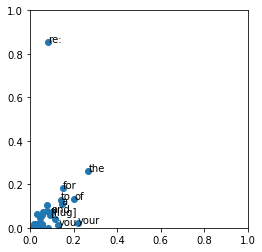

('money', (0.0036199095022624436, 0))
top spam:  ['free', 'get', 'adv:', 'rates', 'home', 'best', '&', '[ilug-social]', 'low', 'systemworks']
1	0	money
1	0	systemworks
1	0	rates
0	0	sale
1	0	year


In [5]:
theseus.node.visualize(n_spam, n_hams, axis_lims=(0.0, 1.0), magnification=10.0)

def create_filter(node_x, node_y, ratio=0.5):
    x, y, keys = theseus.node.create_xy_table(node_x, node_y, cutoff1=100, cutoff2=100, ratio=ratio)
    filter = []
    for row in zip(keys, zip(x, y)):
        if row[0] == 'money':
            print(row)
        filter.append(row[0])
    return filter

ratio = 0.05
f_spam = create_filter(n_spam, n_hams, ratio=ratio)
f_hams = create_filter(n_hams, n_spam, ratio=ratio)
# The spammiest words are “money,” “systemworks,” “rates,” “sale,” and “year,”
print("top spam: ", f_spam[:10])
for word in ['money', 'systemworks', 'rates', 'sale', 'year']:
    res = []
    for fil in [f_spam, hams]:
        res.append("1" if word in fil else "0")
    res.append(word)
    print("\t".join(res))
        
    

In [21]:
def count_hits(group, fil, cutoff, depth):
    area = fil[:depth]
    hits = sum([1 for sentence in group if len([1 for w in sentence if w in area]) >= cutoff])
    return hits
        
cutoff =2
depth = 100
print("total spam: ", len(spam))
print("total hams: ", len(hams))
print("     spam hams")
for target_filter, name in [(f_spam, "spam")]: #, (f_hams, "hams")]:
    sp = count_hits(spam, target_filter, cutoff, depth)
    ha = count_hits(hams, target_filter, cutoff, depth)
    print(sp, ha)
    print("     spam\thams")
    print('spam', sp,  "\t",         len(spam)-sp   )
    print('hams', ha,  "\t",         len(hams)-ha, )
    print("========================")

#  101    38
#  33     704
# This gives 101 true positives (spam classified as “spam”),
# 33 false positives (ham classified as “spam”),
# 704 true negatives (ham classified as “ham”), and
# 38 false negatives (spam classified as “ham”).
# This means our precision is 101 / (101 + 33) = 75%, 
# and our recall is 101 / (101 + 38) = 73%,
# which are not bad numbers for such a simple model.
precision =  float(sp)/(sp + ha)
recall = float(sp)/(sp + len(spam)-sp)
print("Precision = ",  precision, " percent")
print("Recall    = ",  recall,  " percent")
print("F1 SCORE: ", float(2)*(precision * recall)/(precision + recall))

total spam:  498
total hams:  3024
     spam hams
179 30
     spam	hams
spam 179 	 319
hams 30 	 2994
Precision =  0.8564593301435407  percent
Recall    =  0.35943775100401604  percent
F1 SCORE:  0.5063649222065063


In [7]:
# hdr = hd.Hydraseq('')
# for sentence in background:
#     hdr.full_insert(" ".join(sentence))
# len(hdr.columns)

In [8]:
# idx_elem = 10
# sentence = " ".join(background[idx_elem])
# print(sentence)
# print('---------------------------------------------------')

# def to_hydra_rep(sentence):
#     patterns = []
#     for convo in hdr.convolutions(sentence):
#         #print(convo)
#         elems = [cons for cons in convo[2] if cons.startswith('_')]
#         for elem in elems:
#             #print(elem, "\t",hdr.columns[elem][0].get_sequence_nodes())
#             patterns.append(elem)
#     return patterns
        
# to_hydra_rep(sentence)

# def group_to_hydra_rep(group):
#     return [to_hydra_rep(sentence) for sentence in group]

# h_background = group_to_hydra_rep(background)
# h_spam = group_to_hydra_rep(spam)
# h_easy_ham = group_to_hydra_rep(easy_ham)
# h_hard_ham = group_to_hydra_rep(hard_ham)

In [9]:
# n_h_background = theseus.Node(h_background)
# n_h_spam = theseus.Node(h_spam)
# n_h_easy_ham = theseus.Node(h_easy_ham)
# n_h_hard_ham = theseus.Node(h_hard_ham)

In [10]:
# limit = 10
# ratio = 0.1
# target = n_h_spam
# count_hits(h_spam,     target, "spam",     limit, ratio)
# count_hits(h_hard_ham, target, "hard_ham", limit, ratio)
# count_hits(h_easy_ham, target, "easy_ham", limit, ratio)

In [11]:
# theseus.node.visualize(n_h_spam, n_h_background, axis_lims=(0.0, 1.0), magnification=20.0)

In [12]:

# def get_spiral_dots(node1, node2, ratio):
#     x, y, keys = theseus.node.create_xy_table(node1, node2, cutoff1=100, cutoff2=100, ratio=ratio)
#     #print(len(x), len(y), len(keys))
#     cles = []
#     for row in zip(keys, zip(x, y)):
#         if row[1][1] != 0:
#             #print(row)
#             cles.append(row[0])
#         else:
#             cles.append(row[0])
#             #print("bad row ", row)
#     return cles

# ratio = 0.9
# spam_list = get_spiral_dots(n_h_spam, n_h_background, ratio)
# easy_list = get_spiral_dots(n_h_easy_ham, n_h_background, ratio)
# hard_list = get_spiral_dots(n_h_hard_ham, n_h_background, ratio)

# def new_count_hits(group, lst, thold):
#     hits = 0
#     for sentence in group:
#         score = len(set(sentence) & set(lst))
#         if score > thold:
#             hits += 1
#     return hits

# print("background", len(h_background))
# print("totals ", len(h_spam), len(h_easy_ham), len(h_hard_ham))
# thold = 4
# target = spam_list
# spamers  = new_count_hits(h_spam,     target, thold)
# easyhams = new_count_hits(h_easy_ham, target, thold)
# hardhams = new_count_hits(h_hard_ham, target, thold)
# print("hits   ",spamers, easyhams, hardhams)